<a href="https://colab.research.google.com/github/Abhishekg22/HTF23-Team-105/blob/main/SMS_SPAMDETEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [41]:
df= pd.read_csv('spam.csv',encoding='latin-1')

In [42]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...,NaN,NaN,NaN
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...,NaN,NaN,NaN
3420,spam,Welcome! Please reply with your AGE and GENDER...,NaN,NaN,NaN
1540,ham,K come to nordstrom when you're done,NaN,NaN,NaN
4219,ham,U free on sat rite? U wan 2 watch infernal aff...,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [45]:
df.sample(5)

,v1,v2
569,ham,WOT U WANNA DO THEN MISSY?
4828,ham,"How long before you get reply, just defer admi..."
4643,ham,Did u got that persons story
2001,ham,Idea will soon get converted to live:)
2036,ham,You can jot down things you want to remember l...


In [46]:
df=df.rename(columns={"v1":"target","v2":"text"})

In [47]:
df.shape

(5572, 2)

In [48]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(5169, 2)

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [50]:
df.sample(5)

,target,text
4602,0,And I don't plan on staying the night but I pr...
978,0,Hey you can pay. With salary de. Only &lt;#&g...
3669,0,Ok thanx... Take care then...
3759,0,We'll join the &lt;#&gt; bus
2046,0,"Aight fuck it, I'll get it later"


In [51]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [54]:
##EDA
df.value_counts("target")

target
0    4516
1     653
Name: count, dtype: int64

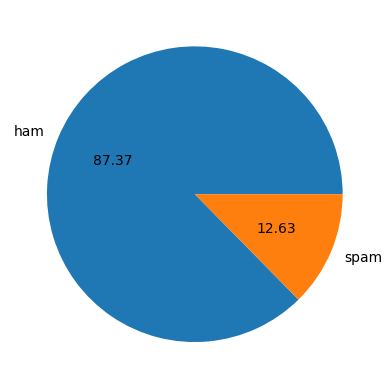

In [58]:
import matplotlib.pyplot as plt
plt.pie(df.value_counts("target"),autopct="%0.2f",labels=['ham','spam'])
plt.show()

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
df['num_charac']=df['text'].apply(len)

In [63]:
df.sample(5)

,target,text,num_charac
192,0,Hi :)finally i completed the course:),37
4487,0,Call me when you get the chance plz &lt;3,41
1740,1,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,159
1927,0,Omg it could snow here tonite!,30
2284,0,"Velly good, yes please!",23


In [72]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [74]:
df.sample(5)

,target,text,num_charac,num_words
4491,0,Probably a couple hours tops,28,5
3513,0,I always chat with you. In fact i need money c...,62,16
729,0,Dunno y u ask me.,17,6
4690,0,Surly ill give it to you:-) while coming to re...,51,14
2450,0,K..give back my thanks.,23,7


In [75]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [76]:
df.sample(5)

,target,text,num_charac,num_words,num_sent
3578,0,Multiply the numbers independently and count d...,126,23,1
1218,0,K..k..i'm also fine:)when will you complete th...,55,17,1
1841,0,I am in your office na.,23,7,1
3654,0,Senthil group company Apnt 5pm.,31,6,1
1488,0,Tell them no need to investigate about me anyw...,51,10,1


In [88]:
df[['num_charac','num_words','num_sent']].describe()

,num_charac,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
import seaborn as sns

In [92]:
  df[df['target']==0][['num_charac','num_words','num_sent']].describe()

,num_charac,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
  df[df['target']==1][['num_charac','num_words','num_sent']].describe()

,num_charac,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_charac', ylabel='Count'>

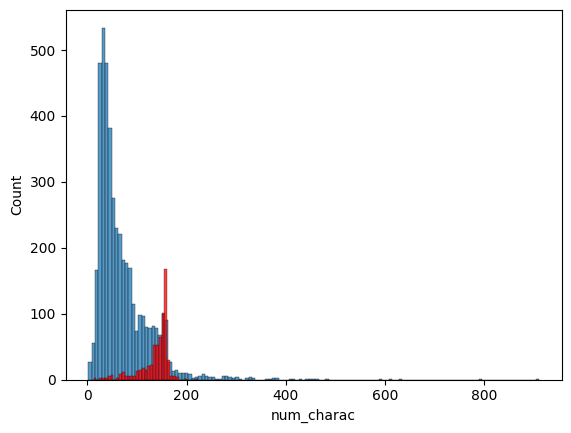

In [99]:
sns.histplot(df[df['target']==0]['num_charac'])
sns.histplot(df[df['target']==1]['num_charac'],color='red')

In [101]:
df.sample(5)

,target,text,num_charac,num_words,num_sent
1500,0,Host-based IDPS for linux systems.,34,6,1
3573,0,Yeah sure I'll leave in a min,29,8,1
1223,0,Rofl betta invest in some anti aging products,46,8,1
358,0,"I'm an actor. When i work, i work in the eveni...",168,41,4
4941,0,"I'm eatin now lor, but goin back to work soon....",106,27,2


In [111]:
sub_df=df[['target','num_charac','num_words','num_sent']]
sub_df.corr()

,target,num_charac,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_charac,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

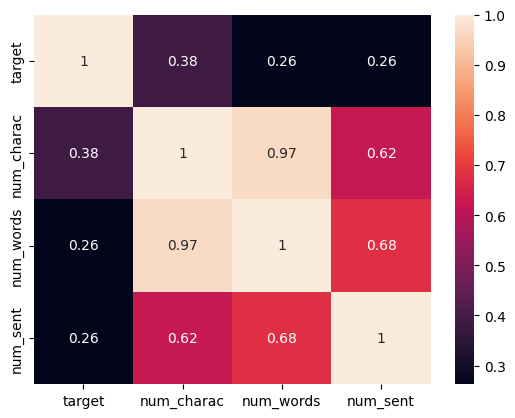

In [112]:
sns.heatmap(sub_df.corr(),annot=True)

In [140]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [148]:
def preprocess(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
      y.append(ps.stem(i))

  return " ".join(y)

In [149]:
preprocess('HI ra mowa %$%$%# ??nigga?? 664for54%%$')

'hi ra mowa nigga 664for54'

In [146]:
df['preprocessed_txt]=df['text'].apply(preprocess)

In [154]:
df.drop(columns=['preprocessed_txt_lmma'],inplace=True)

In [155]:
df.head()

,target,text,num_charac,num_words,num_sent,preprocessed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [158]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,background_color='lavender',min_font_size=10)

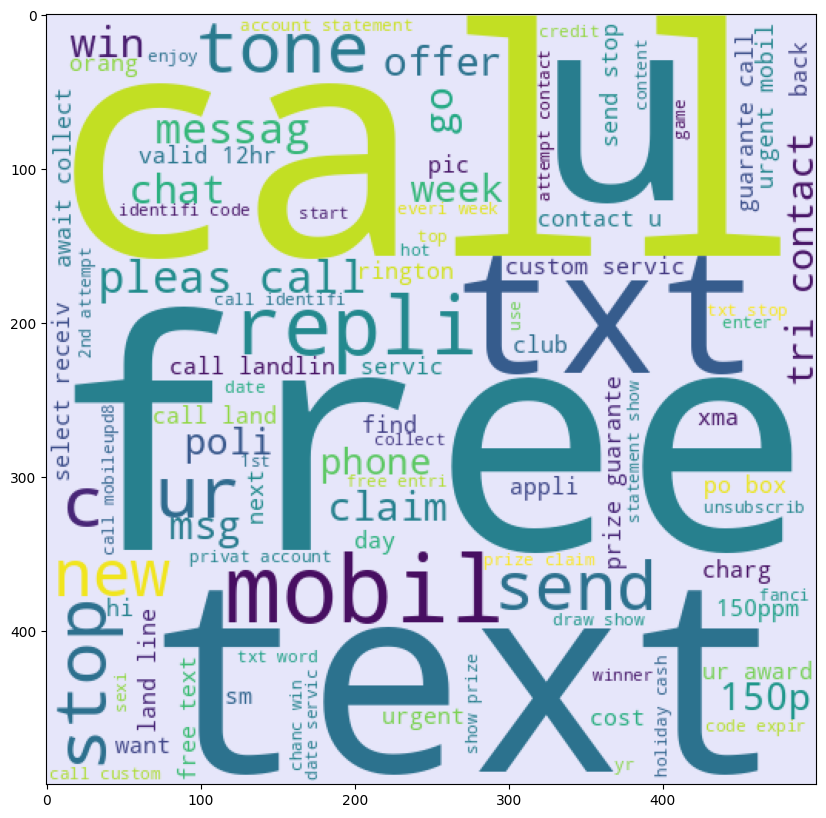

In [162]:
spam_wc=wc.generate(df[df['target']==1]['preprocessed_txt'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

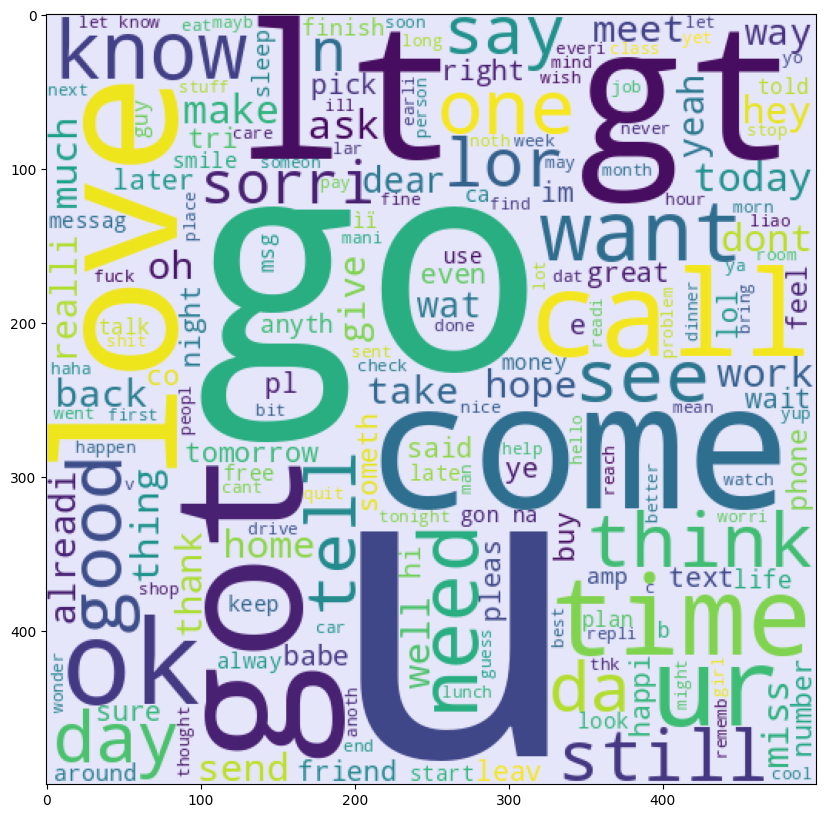

In [163]:
ham_wc=wc.generate(df[df['target']==0]['preprocessed_txt'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)